In [1]:
2+2

4

Q6. Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.

Insights to be drawn - 
● Get all Pokemons whose spawn rate is less than 5%
● Get all Pokemons that have less than 4 weaknesses
● Get all Pokemons that have no multipliers at all
● Get all Pokemons that do not have more than 2 evolutions
● Get all Pokemons whose spawn time is less than 300 seconds.

In [117]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [4]:
# reading data from the link 
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
response = requests.get(url)
data = response.json()

In [9]:
data=data["pokemon"]

In [10]:
df = pd.json_normalize(data)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              151 non-null    int64  
 1   num             151 non-null    object 
 2   name            151 non-null    object 
 3   img             151 non-null    object 
 4   type            151 non-null    object 
 5   height          151 non-null    object 
 6   weight          151 non-null    object 
 7   candy           151 non-null    object 
 8   candy_count     70 non-null     float64
 9   egg             151 non-null    object 
 10  spawn_chance    151 non-null    float64
 11  avg_spawns      151 non-null    float64
 12  spawn_time      151 non-null    object 
 13  multipliers     70 non-null     object 
 14  weaknesses      151 non-null    object 
 15  next_evolution  70 non-null     object 
 16  prev_evolution  72 non-null     object 
dtypes: float64(3), int64(1), object(13)

In [36]:
df.head(5)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,None,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


In [211]:
# Get all Pokemons whose spawn rate is less than 5%
less_than_5per= df[df["spawn_chance"] < 0.05]
less_than_5per=less_than_5per[["name","spawn_chance"]].sort_values(by="spawn_chance",ascending=True)
less_than_5per

,name,spawn_chance
150,Mew,0.000
131,Ditto,0.000
145,Moltres,0.000
144,Zapdos,0.000
143,Articuno,0.000
...,...,...
116,Seadra,0.034
66,Machoke,0.034
79,Slowbro,0.036
27,Sandslash,0.037


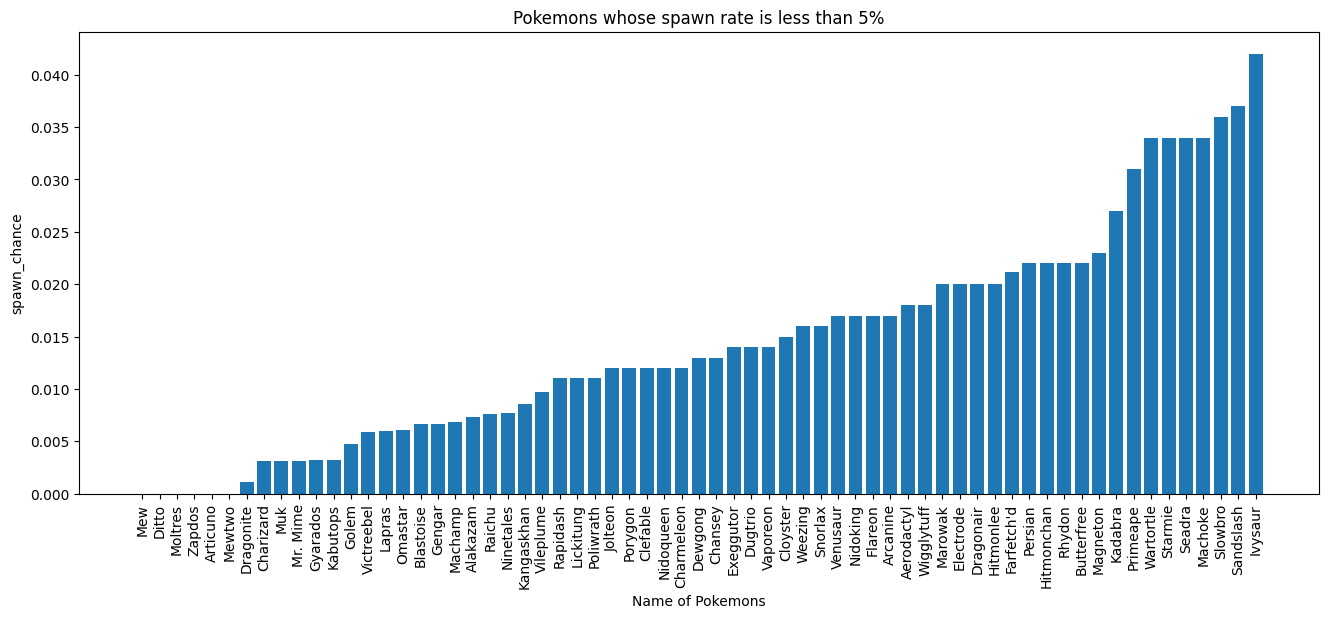

In [213]:
plt.figure(figsize=(16, 6))
plt.bar(less_than_5per["name"] ,less_than_5per["spawn_chance"])
plt.xlabel('Name of Pokemons')
plt.xticks(rotation=90)
plt.ylabel('spawn_chance')
plt.title('Pokemons whose spawn rate is less than 5%')
plt.show()

In [181]:
# Get all Pokemons that have less than 4 weaknesses
less_than_4weaknesses = df[df["weaknesses"].str.len() < 4]
less_than_4weaknesses=less_than_4weaknesses[["name","weaknesses"]]
less_than_4weaknesses

,name,weaknesses
3,Charmander,"[Water, Ground, Rock]"
4,Charmeleon,"[Water, Ground, Rock]"
5,Charizard,"[Water, Electric, Rock]"
6,Squirtle,"[Electric, Grass]"
7,Wartortle,"[Electric, Grass]"
...,...,...
145,Moltres,"[Water, Electric, Rock]"
146,Dratini,"[Ice, Dragon, Fairy]"
147,Dragonair,"[Ice, Dragon, Fairy]"
149,Mewtwo,"[Bug, Ghost, Dark]"


In [206]:
df['weak_counts']=less_than_4weaknesses["weaknesses"].apply(len)
weakcounts= df[df['weak_counts'] >0]
weakcounts = weakcounts[["name", "weak_counts"]].sort_values(by="weak_counts",ascending=True)
weakcounts

,name,weak_counts
52,Persian,1.0
142,Snorlax,1.0
136,Porygon,1.0
34,Clefairy,1.0
35,Clefable,1.0
...,...,...
81,Magneton,3.0
95,Drowzee,3.0
96,Hypno,3.0
62,Abra,3.0


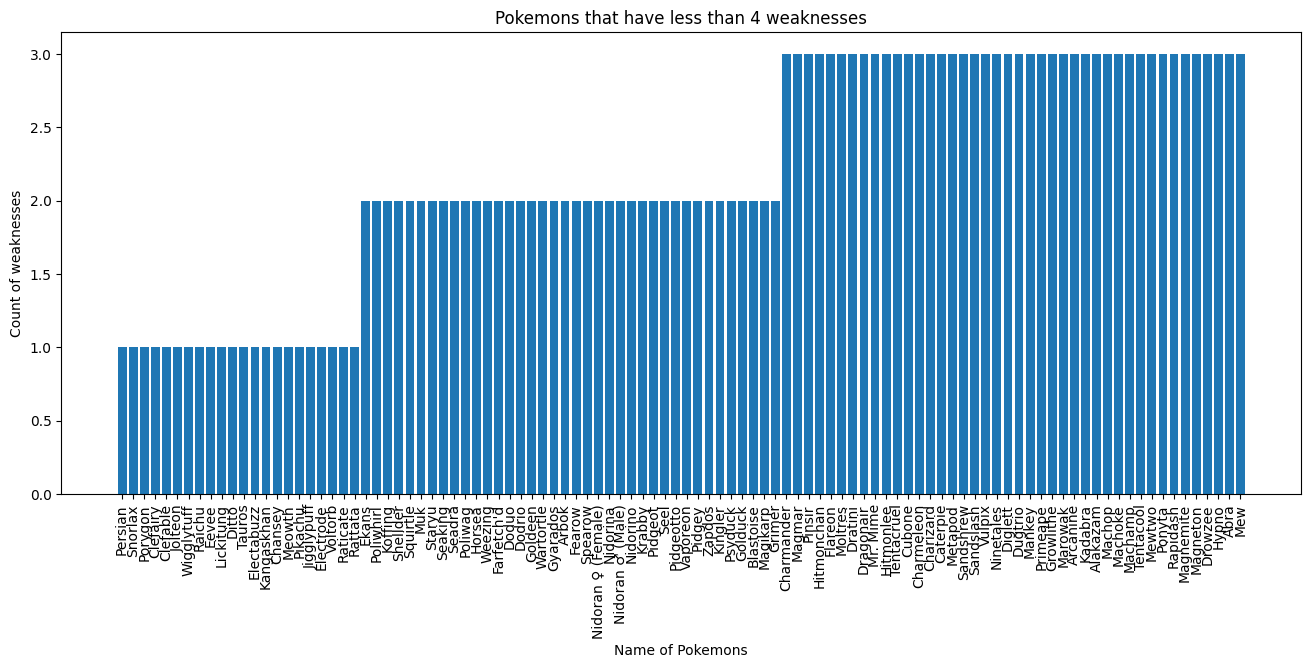

In [209]:
plt.figure(figsize=(16, 6))
plt.bar(weakcounts["name"] ,weakcounts["weak_counts"])
plt.xlabel('Name of Pokemons')
plt.xticks(rotation=90)
plt.ylabel('Count of weaknesses')
plt.title('Pokemons that have less than 4 weaknesses')
plt.show()

In [80]:
# Get all Pokemons that have no multipliers at all

no_multipliers = df[df["multipliers"].apply(lambda x: x is None or len(x) == 0)]
no_multipliers=no_multipliers[["name","multipliers"]] 
print(len(no_multipliers))
no_multipliers

81


,name,multipliers
2,Venusaur,None
5,Charizard,None
8,Blastoise,None
11,Butterfree,None
14,Beedrill,None
...,...,...
144,Zapdos,None
145,Moltres,None
148,Dragonite,None
149,Mewtwo,None


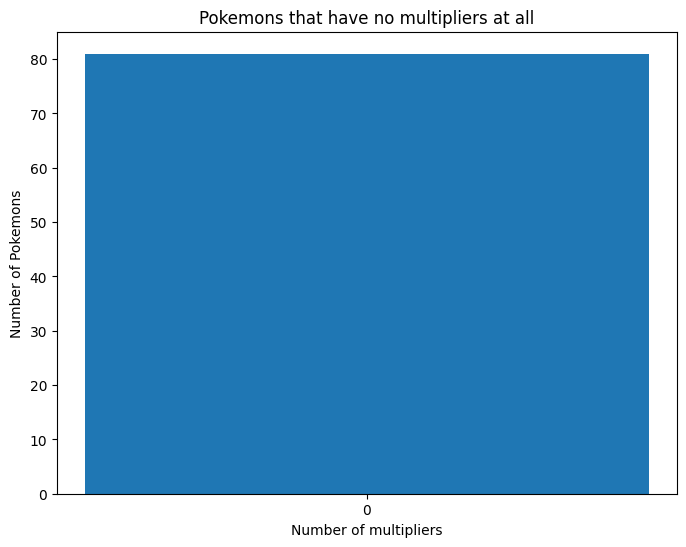

In [172]:
plt.figure(figsize=(8, 6))
plt.bar("0" ,len(no_multipliers))
plt.xlabel('Number of multipliers')
plt.ylabel('Number of Pokemons')
plt.title('Pokemons that have no multipliers at all')
plt.show()

In [139]:
#Get all Pokemons that do not have more than 2 evolutions

not_more2_evl=df[df["next_evolution"].apply(lambda x: isinstance(x, list) and len(x) <= 2)]
not_more2_evl=not_more2_evl[["name","next_evolution"]]
not_more2_evl

,name,next_evolution
0,Bulbasaur,"[{'num': '002', 'name': 'Ivysaur'}, {'num': '0..."
1,Ivysaur,"[{'num': '003', 'name': 'Venusaur'}]"
3,Charmander,"[{'num': '005', 'name': 'Charmeleon'}, {'num':..."
4,Charmeleon,"[{'num': '006', 'name': 'Charizard'}]"
6,Squirtle,"[{'num': '008', 'name': 'Wartortle'}, {'num': ..."
...,...,...
128,Magikarp,"[{'num': '130', 'name': 'Gyarados'}]"
137,Omanyte,"[{'num': '139', 'name': 'Omastar'}]"
139,Kabuto,"[{'num': '141', 'name': 'Kabutops'}]"
146,Dratini,"[{'num': '148', 'name': 'Dragonair'}, {'num': ..."


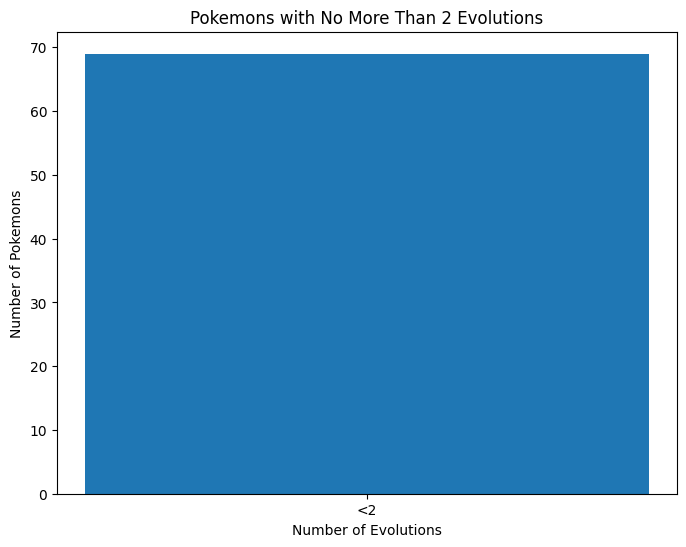

In [170]:
# Plotting 
plt.figure(figsize=(8, 6))
plt.bar("<2" ,len(not_more2_evl))
plt.xlabel('Number of Evolutions')
plt.ylabel('Number of Pokemons')
plt.title('Pokemons with No More Than 2 Evolutions')
plt.show()

In [ ]:
hu=[]
for i in not_more2_evl['next_evolution']:
    if type(i) == dict.values:
        hu.append(i)
hu

In [121]:
def spawn_time_to_seconds(time):
    if time == 'N/A':
        return 0  # Setting default value for "N/A" spawn time as 0
    minutes, seconds = map(int, time.split(':'))
    return minutes * 60 + seconds

In [134]:
# Convert spawn time to seconds
df['spawn_time_seconds'] = df['spawn_time'].apply(spawn_time_to_seconds)

# Filter Pokémon with spawn time less than 300 seconds
seconds_df = df[(df['spawn_time_seconds'] < 300) & (df['spawn_time_seconds'] > 0)]
seconds_df=seconds_df[["name","spawn_time_seconds"]].sort_values(by="spawn_time_seconds", ascending=True)
print(len(seconds_df))
seconds_df

75


,name,spawn_time_seconds
139,Kabuto,5
8,Blastoise,6
92,Haunter,10
127,Tauros,37
82,Farfetch'd,69
...,...,...
62,Abra,270
99,Voltorb,276
112,Chansey,286
14,Beedrill,290


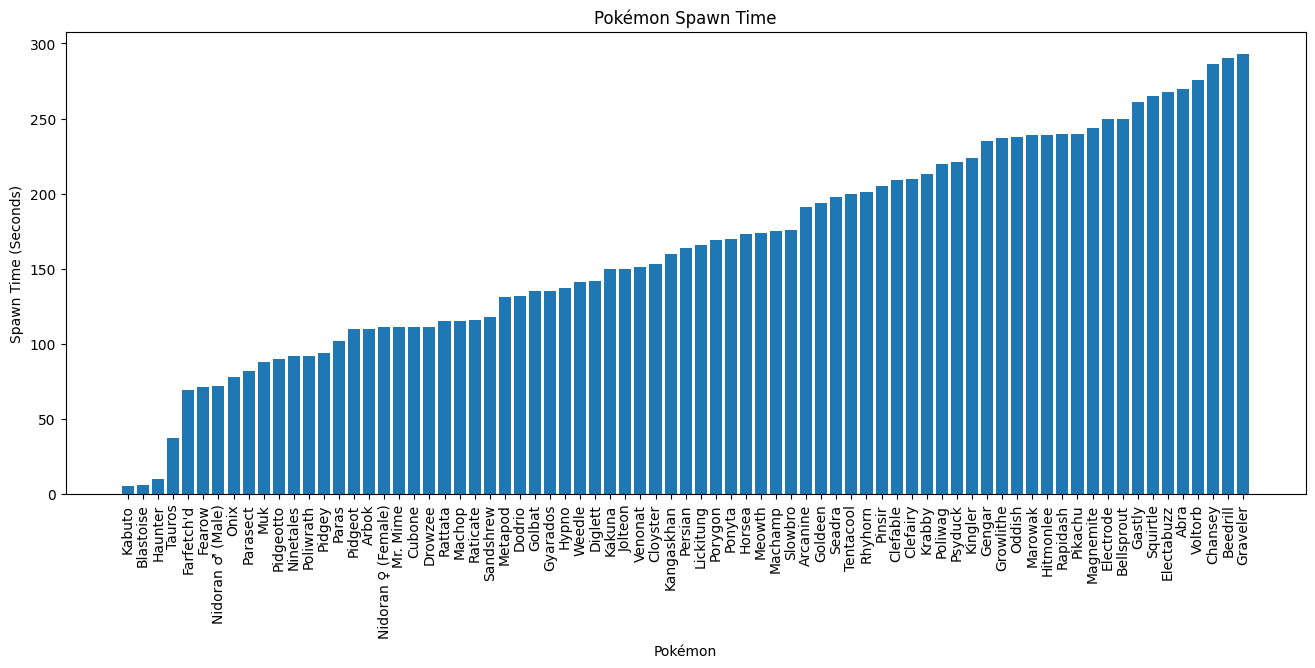

In [136]:
plt.figure(figsize=(16, 6))
plt.bar(seconds_df['name'], seconds_df['spawn_time_seconds'])
plt.xlabel('Pokémon')
plt.ylabel('Spawn Time (Seconds)')
plt.title('Pokémon Spawn Time')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [214]:
df

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,spawn_time_seconds,weak_counts
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,1200,NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",420,NaN
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,None,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",690,NaN
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,525,3.0
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",1140,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"[1.83, 1.84]","[Ice, Dragon, Fairy]","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN,401,3.0
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,[2.05],"[Ice, Dragon, Fairy]","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]",717,3.0
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,None,"[Ice, Rock, Dragon, Fairy]",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1...",1418,NaN
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,N/A,None,"[Bug, Ghost, Dark]",NaN,NaN,0,3.0


In [216]:
# Pokemon with more than two types of capabilities
typesdf=df[df["type"].str.len()>2]
typesdf

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,spawn_time_seconds,weak_counts
